In [5]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import math
pi = math.pi

m = 1000 # kgs
k = 20000 # (N/m)
xi = 0.05 # damping constant
P = 750 # N, force applied to structure
f = 1 # Hz, the frequecy of the applied force
pi = math.pi 

# Properties of structures.
omega_n = math.sqrt(k/m)
f_n = 2*pi*omega_n
omega_d = omega_n*math.sqrt(1-xi**2)
omega = 2*pi*f
beta = omega/omega_n
tmax = 30
delta_t = 0.01
nPoints = tmax/delta_t


t = np.linspace(0,tmax,int(nPoints))

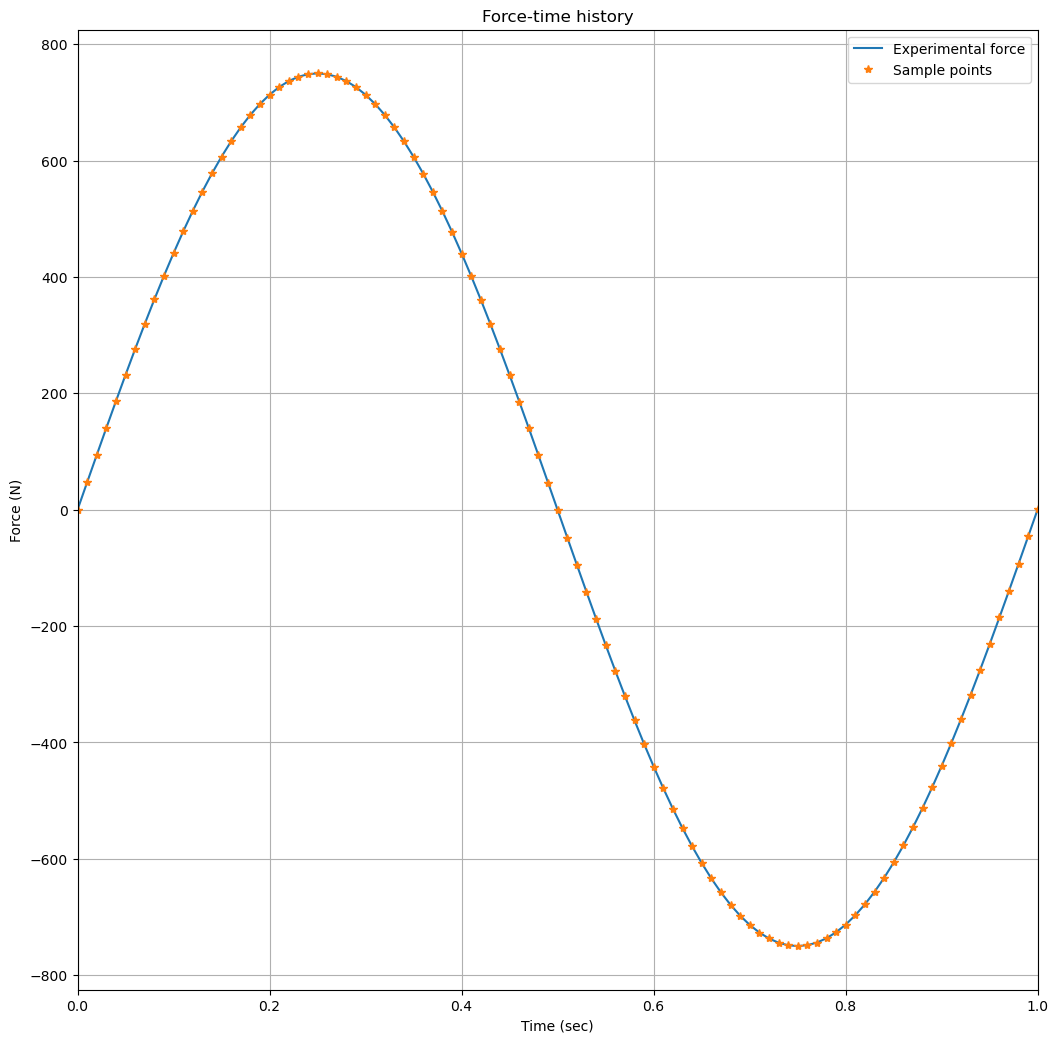

In [8]:
#Generating Force Vector
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.5,2])
axes.plot(t,F_sine,label='Experimental force')
axes.plot(t,F_sine,'*',label='Sample points')
axes.set_xlim([0,1])
axes.set_xlabel('Time (sec)')
axes.set_ylabel('Force (N)')
axes.set_title('Force-time history')
axes.grid()
axes.legend()
plt.show()

In [167]:
# Defining a function to genrate force vector based on segments.

def generateForce(n,tmax,F):
    nSegments = n*tmax # Total number of segments in complete tmax.
    timeSamples = np.linspace(0,tmax,nSegments+1,endpoint=True)
    forceSamples = F*np.sin(omega*timeSamples)
    
    T = np.array([])
    F = np.array([])
    
    
    for n in range(0,nSegments):
        
        if n == (nSegments-1):
            timeVector = np.linspace(timeSamples[n],timeSamples[n+1],num = int(nPoints/nSegments),endpoint=True)
            forceVector = np.linspace(forceSamples[n],forceSamples[n+1],num = int(nPoints/nSegments),endpoint=True)
        else:
            timeVector = np.linspace(timeSamples[n],timeSamples[n+1],num = int(nPoints/nSegments),endpoint=False)
            forceVector = np.linspace(forceSamples[n],forceSamples[n+1],num = int(nPoints/nSegments),endpoint=False)
        
        T = np.append(T,timeVector,axis=0)
        F = np.append(F,forceVector,axis=0)
    return [T,F,forceSamples,timeSamples]

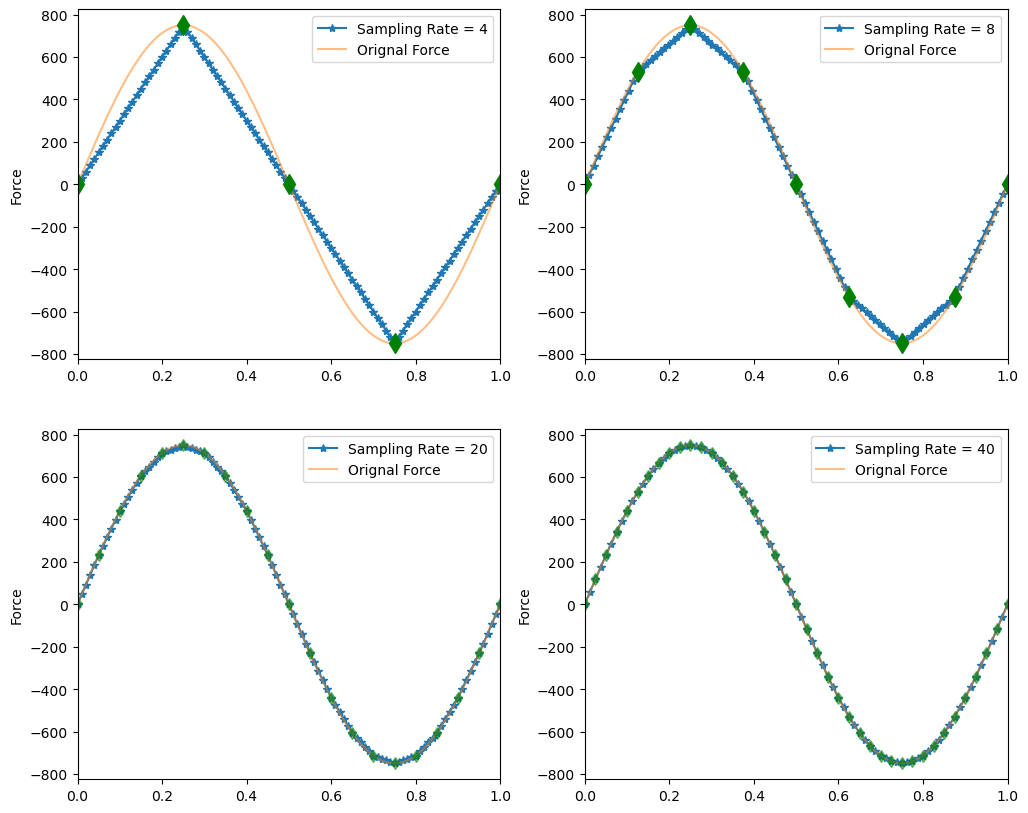

In [187]:
T4,F4,sp4,f_sp4 = generateForce(4,tmax,P)
T8,F8,sp8,f_sp8 = generateForce(8,tmax,P)
T20,F20,sp20,f_sp20 = generateForce(20,tmax,P)
T40,F40,sp40,f_sp40 = generateForce(40,tmax,P)

# Plotting
fig, axes = plt.subplots(figsize=(12,10),nrows=2,ncols=2)

axes[0][0].set_ylabel('Force')
axes[0][0].plot(T4,F4,'-*',label = 'Sampling Rate = 4')
axes[0][0].plot(t,F_sine,label = 'Orignal Force',alpha=0.5)
axes[0][0].plot(f_sp4,sp4,'gd',markersize = 10)
axes[0][0].set_xlim([0,1])
axes[0][0].legend()

axes[0][1].set_ylabel('Force')
axes[0][1].plot(T8,F8,'-*',label = 'Sampling Rate = 8')
axes[0][1].plot(t,F_sine,label = 'Orignal Force',alpha=0.5)
axes[0][1].plot(f_sp8,sp8,'gd',markersize = 10)
axes[0][1].set_xlim([0,1])
axes[0][1].legend()

axes[1][0].set_ylabel('Force')
axes[1][0].plot(T20,F20,'-*',label = 'Sampling Rate = 20')
axes[1][0].plot(t,F_sine,label = 'Orignal Force',alpha=0.5)
axes[1][0].plot(f_sp20,sp20,'gd',markersize = 6,alpha=0.5)
axes[1][0].set_xlim([0,1])
axes[1][0].legend()

axes[1][1].set_ylabel('Force')
axes[1][1].plot(T40,F40,'-*',label = 'Sampling Rate = 40')
axes[1][1].plot(t,F_sine,label = 'Orignal Force',alpha=0.5)
axes[1][1].plot(f_sp40,sp40,'gd',markersize = 6,alpha=0.5)
axes[1][1].set_xlim([0,1])
axes[1][1].legend()


plt.show()

In [125]:
# to calculate the position and velocity of the structure at any given time.

def responseCalculation(timeVector,forceVector):
    nPoints = len(timeVector)
    delta_t = max(timeVector)/nPoints
    
    A = math.e**(-xi*omega_n*delta_t)*((xi/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t)+np.cos(omega_d*delta_t))
    B = math.e**(-xi*omega_n*delta_t)*((1/omega_d*np.sin(omega_d*delta_t)))
    C = (1/k)*(((2*xi)/(omega_n*delta_t)) + math.e**(-xi*omega_n*delta_t)*((((1-2*(xi**2))/(omega_d*delta_t))-(xi/(math.sqrt(1-(xi**2)))))*math.sin(omega_d*delta_t)-(1+((2*xi)/(omega_n*delta_t)))*np.cos(omega_d*delta_t)))
    D = (1/k)*(1-((2*xi)/(omega_n*delta_t))+math.e**(-xi*omega_n*delta_t)*(((2*(xi**2)-1)/(omega_d*delta_t))*np.sin(omega_d*delta_t)+((2*xi)/(omega_n*delta_t))*np.cos(omega_d*delta_t)))

    A1 = -math.e**(-xi*omega_n*delta_t)*((omega_n/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t))
    B1 = math.e**(-xi*omega_n*delta_t)*(np.cos(omega_d*delta_t)-((xi)/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t))
    C1 =(1/k)*(-(1/delta_t)+math.e**(-xi*omega_n*delta_t)*((((omega_n)/(math.sqrt(1-(xi**2))))+((xi)/(delta_t*math.sqrt(1-(xi**2)))))*np.sin(omega_d*delta_t)+(1/delta_t)*np.cos(omega_d*delta_t)))
    D1 =(1/k)*((1/delta_t)-(math.e**(-xi*omega_n*delta_t)/delta_t)*((xi/(math.sqrt(1-(xi**2))))*np.sin(omega_d*delta_t)+np.cos(omega_d*delta_t))) 
    
    u0 = 0
    v0 = 0
    position = []
    velocity = []
    
    for n,timeStep in enumerate(timeVector):
        timeStep = round(timeStep,3)
        #print(n,timeStep)
        if n < nPoints-1:
            F_n = forceVector[n]
            F_np1 = forceVector[n+1]
            #print(f'{n}: {F_n} and {F_np1}')
        else:
            F_n = forceVector[n]
            F_np1 = 0
            #print('This is the end')
            #print(f'{n}: {F_n} and {F_np1}')
    
        curr_pos = A*u0 + B*v0 + C*F_n + D*F_np1
        curr_vel = A1*u0 + B1*v0 + C1*F_n + D1*F_np1
    
        position.append(curr_pos)
        velocity.append(curr_vel)
    
        u0 = curr_pos
        v0 = curr_vel
    
    return position,velocity


In [132]:
position_4= responseCalculation(T4,F4)[0]
position_8 = responseCalculation(T8,F8)[0]
position_20 = responseCalculation(T20,F20)[0]
position_40 = responseCalculation(T40,F40)[0]


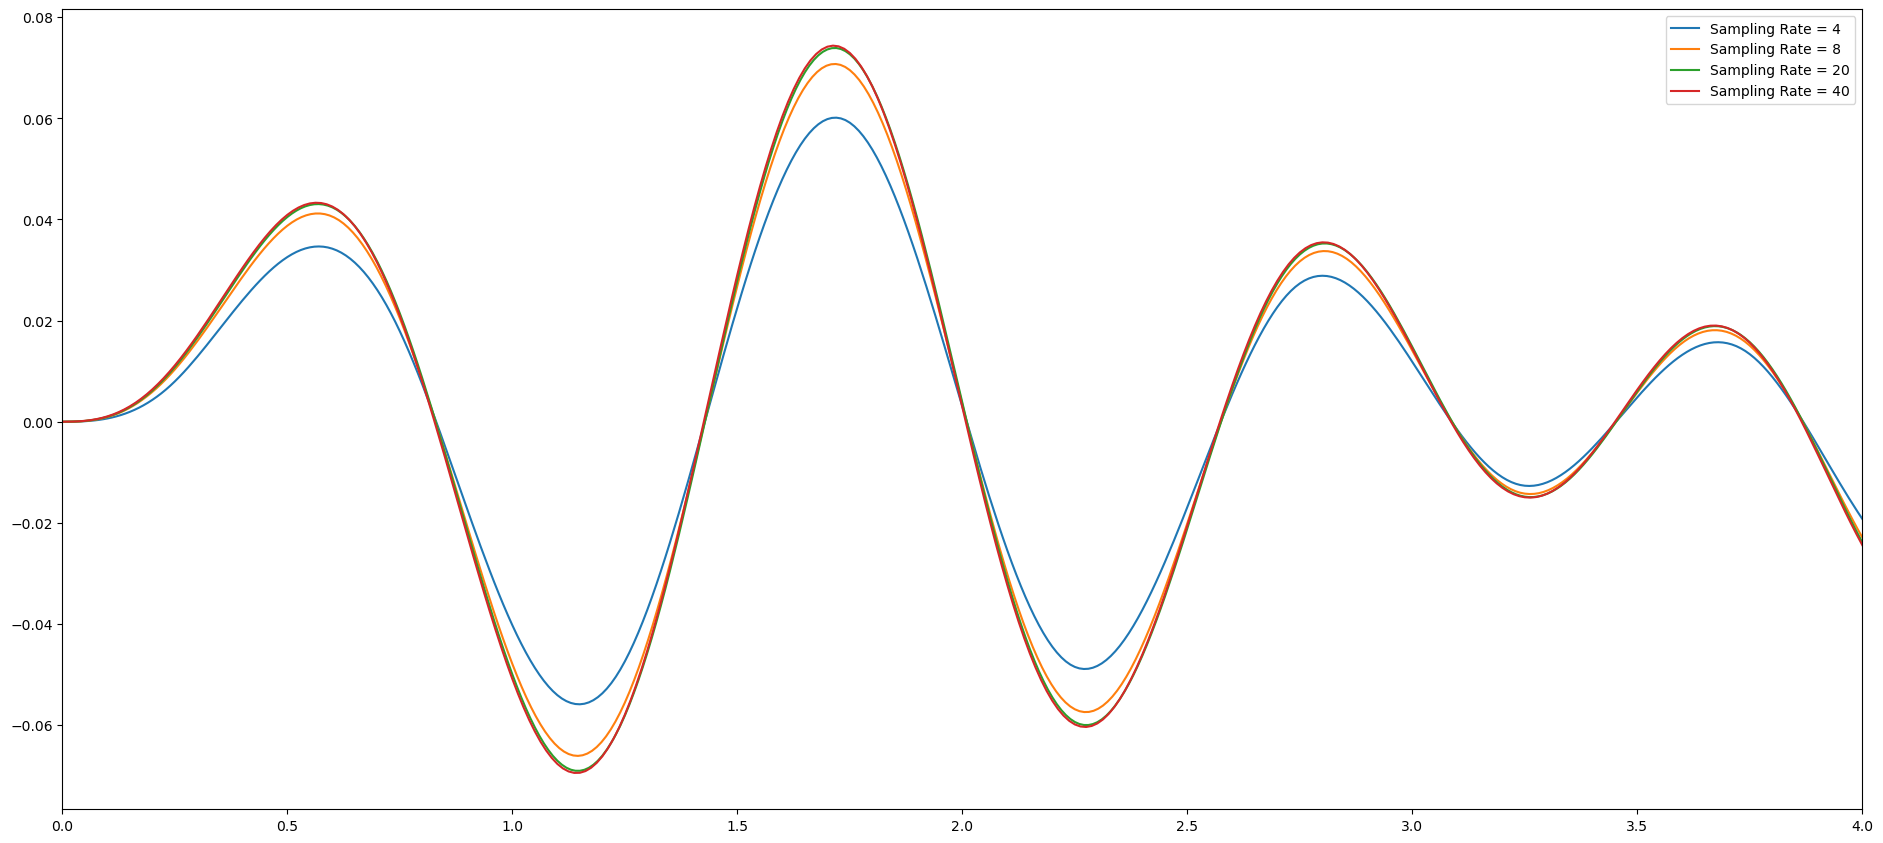

In [143]:
fig = plt.figure(figsize=(12,8))
axes = fig.add_axes([0.1,0.1,1.5,1])
axes.plot(T4,position_4,label = 'Sampling Rate = 4')
axes.plot(T8,position_8,label = 'Sampling Rate = 8')
axes.plot(T20,position_20,label = 'Sampling Rate = 20')
axes.plot(T40,position_40,label = 'Sampling Rate = 40')
axes.set_xlim([0,4])
plt.legend()
plt.show()